In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
# @Time    : 2020/1/13 16:28
# @Author  : Shark
# @Site    :
# @File    : tsts_trainer.py
# @Software: PyCharm

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import tensorflow as tf

print(tf.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

# On CPU/GPU placement
config = tf.compat.v1.ConfigProto(allow_soft_placement=True, log_device_placement=True)
config.gpu_options.allow_growth = True
tf.compat.v1.Session(config=config)


2.0.0
Num GPUs Available:  1
Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: TITAN RTX, pci bus id: 0000:05:00.0, compute capability: 7.5



In [2]:
from kashgari.trainer.sampler_multi_task_trainer import SamplerMultiTaskTrainer
from kashgari.task import ReadabilityTask, NerTask, AlluSourceTask,AlluClassTask
from kashgari.processors import ClassificationProcessor, LabelingProcessor

poem_seq_len = 30
task_list = []



processor = LabelingProcessor(vocab_path="../pretrained_embedding/bert/poem_chinese_L-12_H-768_A-12/")
ner_task = NerTask(processor,
                   "./allusion_corpus",
                   poem_seq_len)
task_list.append(ner_task)

processor = ClassificationProcessor(vocab_path="../pretrained_embedding/bert/poem_chinese_L-12_H-768_A-12/")
allu_source_task = AlluSourceTask(processor,
                                  "./allusion_corpus",
                                  poem_seq_len,
                                  num_samples=150000)
task_list.append(allu_source_task)


Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: TITAN RTX, pci bus id: 0000:05:00.0, compute capability: 7.5



I:LOAD NER CORPUS:[ner_task.p: 65]:loaded 21596 samples from ./allusion_corpus/train.data. Samples:
x[0]: ['纶', '綍', '谋', '猷', '盛', ',', '丹', '青', '步', '武', '亲', '。']
y[0]: ['B-ALLU', 'I-ALLU', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']


In [3]:
allu_def_seq_len = poem_seq_len
trainer = SamplerMultiTaskTrainer(task_list=task_list,
                                  batch_size=64,
                                  total_epochs=50,
                                  poem_seq_len=poem_seq_len,
                                  allu_def_seq_len=allu_def_seq_len)

final_res = trainer.train()


I:BASE TASK:[base_task.:270]:Task NER:
I:BASE TASK:[base_task.:271]:	230 training batches
I:BASE TASK:[base_task.:272]:	41 validation batches
I:BASE TASK:[base_task.:273]:	68 test batches
I:BASE TASK:[base_task.:270]:Task ALLU_SOURCE:
I:BASE TASK:[base_task.:271]:	319 training batches
I:BASE TASK:[base_task.:272]:	57 validation batches
I:BASE TASK:[base_task.:273]:	469 test batches
I:BERT EMBEDDING:[bert_embed:105]:seq_len:30
I:BERT EMBEDDING:[bert_embed:105]:seq_len:30
I:AHMTL MODEL:[AHMTL.py:126]:Multi-Task Learning Model has been instantiated.
I:CUR_SPLIT:0:[sampler_mu: 92]:Set up ready. Begining training/validation.
I:BASE-MODEL:[base_model:133]:NER's model_dir is ./model_ckpt/2020-02-05-02_23_48/0/NER-Naive_CRF_Model
I:BASE-MODEL:[base_model:232]:[NER]:train info:Train on 14684 samples, validate on 2592 samples
I:BASE-MODEL:[base_model:133]:ALLU_SOURCE's model_dir is ./model_ckpt/2020-02-05-02_23_48/0/ALLU_SOURCE-NaiveDenseModel
I:BASE-MODEL:[base_model:232]:[ALLU_SOURCE]:train in

Epoch 1/50
549/549 [==============================] - 365s 665ms/step - task_name: ALLU_SOURCE - loss: 0.6722 - accuracy: 0.5743 - val_loss: 0.6705 - val_accuracy: 0.6253 


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 2/50
549/549 [==============================] - 240s 438ms/step - task_name: ALLU_SOURCE - loss: 0.6029 - accuracy: 0.6659 - val_loss: 0.6204 - val_accuracy: 0.6645


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 3/50
549/549 [==============================] - 190s 345ms/step - task_name: ALLU_SOURCE - loss: 0.5776 - accuracy: 0.7001 - val_loss: 0.5576 - val_accuracy: 0.6891


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 4/50
549/549 [==============================] - 195s 355ms/step - task_name: ALLU_SOURCE - loss: 0.5080 - accuracy: 0.7246 - val_loss: 0.5563 - val_accuracy: 0.7050


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 5/50
549/549 [==============================] - 174s 318ms/step - task_name: ALLU_SOURCE - loss: 0.5040 - accuracy: 0.7413 - val_loss: 0.5818 - val_accuracy: 0.6996


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 6/50
549/549 [==============================] - 179s 325ms/step - task_name: ALLU_SOURCE - loss: 0.4874 - accuracy: 0.7560 - val_loss: 0.5431 - val_accuracy: 0.7267


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 7/50
549/549 [==============================] - 176s 321ms/step - task_name: ALLU_SOURCE - loss: 0.4227 - accuracy: 0.7634 - val_loss: 0.5812 - val_accuracy: 0.7138


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 8/50
549/549 [==============================] - 174s 318ms/step - task_name: ALLU_SOURCE - loss: 0.4451 - accuracy: 0.7709 - val_loss: 0.5558 - val_accuracy: 0.7294


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 9/50
549/549 [==============================] - 181s 329ms/step - task_name: ALLU_SOURCE - loss: 0.4339 - accuracy: 0.7839 - val_loss: 0.5666 - val_accuracy: 0.7229


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 10/50
548/549 [============================>.] - ETA: 0s - task_name: ALLU_SOURCE - loss: 0.4916 - accuracy: 0.7747
Epoch 00010: ReduceLROnPlateau reducing learning rate to 0.0007000000332482159.
549/549 [==============================] - 114s 207ms/step - task_name: ALLU_SOURCE - loss: 0.4555 - accuracy: 0.7748 - val_loss: 0.5270 - val_accuracy: 0.7333


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 11/50
549/549 [==============================] - 110s 200ms/step - task_name: ALLU_SOURCE - loss: 0.4305 - accuracy: 0.7900 - val_loss: 0.5694 - val_accuracy: 0.7220


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 12/50
549/549 [==============================] - 117s 213ms/step - task_name: ALLU_SOURCE - loss: 0.4348 - accuracy: 0.7937 - val_loss: 0.5222 - val_accuracy: 0.7418


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 13/50
549/549 [==============================] - 114s 207ms/step - task_name: ALLU_SOURCE - loss: 0.4048 - accuracy: 0.8041 - val_loss: 0.5236 - val_accuracy: 0.7355


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 14/50
549/549 [==============================] - 108s 197ms/step - task_name: ALLU_SOURCE - loss: 0.3762 - accuracy: 0.8128 - val_loss: 0.5819 - val_accuracy: 0.7262


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 15/50
549/549 [==============================] - 116s 212ms/step - task_name: ALLU_SOURCE - loss: 0.4012 - accuracy: 0.8154 - val_loss: 0.5543 - val_accuracy: 0.7464


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 16/50
549/549 [==============================] - 115s 209ms/step - task_name: ALLU_SOURCE - loss: 0.3893 - accuracy: 0.8203 - val_loss: 0.5871 - val_accuracy: 0.7555


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 17/50
549/549 [==============================] - 114s 207ms/step - task_name: ALLU_SOURCE - loss: 0.3712 - accuracy: 0.8244 - val_loss: 0.6318 - val_accuracy: 0.7484


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 18/50
549/549 [==============================] - 108s 197ms/step - task_name: ALLU_SOURCE - loss: 0.3439 - accuracy: 0.8273 - val_loss: 0.5297 - val_accuracy: 0.7434


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 19/50
549/549 [==============================] - 112s 203ms/step - task_name: ALLU_SOURCE - loss: 0.3579 - accuracy: 0.8324 - val_loss: 0.5580 - val_accuracy: 0.7536


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 20/50
549/549 [==============================] - 116s 212ms/step - task_name: ALLU_SOURCE - loss: 0.3650 - accuracy: 0.8356 - val_loss: 0.5671 - val_accuracy: 0.7486


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 21/50
549/549 [==============================] - 112s 204ms/step - task_name: ALLU_SOURCE - loss: 0.3348 - accuracy: 0.8444 - val_loss: 0.6291 - val_accuracy: 0.7429


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 22/50
549/549 [==============================] - 114s 208ms/step - task_name: ALLU_SOURCE - loss: 0.3398 - accuracy: 0.8472 - val_loss: 0.6407 - val_accuracy: 0.7508


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 23/50
549/549 [==============================] - 111s 202ms/step - task_name: ALLU_SOURCE - loss: 0.3213 - accuracy: 0.8519 - val_loss: 0.6716 - val_accuracy: 0.7418


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------



----------------------------------NER LABEL METRICS -----------------------------------

epoch:labeling EPOCH accuracy 0.820636 precision: 0.417230, recall: 0.428439, f1: 0.422761

           precision    recall  f1-score   support

     ALLU     0.4172    0.4284    0.4228      4318

micro avg     0.4172    0.4284    0.4228      4318
macro avg     0.4172    0.4284    0.4228      4318

----------------------------------NER END ----------------------------------
train_example:**************************************************
x_seq:无 复 平 原 赋 , 空 余 邻 笛 声 。
y_pred:O O B-ALLU I-ALLU I-ALLU O O O B-ALLU I-ALLU O O
y_true:O O B-ALLU I-ALLU I-ALLU O O O O O O O
----------
x_seq:阮 籍 为 太 守 , 乘 驴 上 东 平 。 剖 竹 十 日 间 , 一 朝 风 化 清 。
y_pred:B-ALLU I-ALLU O O O O O O O O O O O O O O O O O O O O O O
y_true:O O O O O O B-ALLU I-ALLU I-ALLU I-ALLU I-ALLU O O O O O O O O O O O O O
----------
x_seq:望 霖 窥 润 础 , 思 吹 候 生 条 。
y_pred:O O O O O O O O O O O O
y_true:O O O B-ALLU I-ALLU O O O O O O O
----------
x_s

I:SAMPLE_TRAINER:[sampler_mu: 43]:cur_split_idx 0th END
I:SAMPLE_TRAINER:[sampler_mu: 44]:****************************************************************************************************
I:SAMPLE_TRAINER:[sampler_mu: 45]:****************************************************************************************************
I:BASE TASK:[base_task.:270]:Task NER:
I:BASE TASK:[base_task.:271]:	230 training batches
I:BASE TASK:[base_task.:272]:	41 validation batches
I:BASE TASK:[base_task.:273]:	68 test batches


example:**************************************************
x_seq:花 扑 征 衣 看 似 绣 , 云 随 马 去 色 疑 [UNK] 。 [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
x_ALLU:辟 司 徒 袁 [UNK] 府 , 举 高 第 , 拜 侍 御 史 。 是 时 宦 官 秉 权 , 典 持 政 无 所 回
y_pred:[0.865597]
y_true:1
----------
x_seq:花 扑 征 衣 看 似 绣 , 云 随 马 去 色 疑 [UNK] 。 [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
x_ALLU:古 公 [UNK] 父 复 脩 后 稷 、 公 刘 之 业 , 积 德 行 义 , 国 人 皆 戴 之 。 薰 育 戎 狄
y_pred:[0.32997584]
y_true:0
----------
x_seq:花 扑 征 衣 看 似 绣 , 云 随 马 去 色 疑 [UNK] 。 [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
x_ALLU:乐 羊 为 魏 将 而 攻 中 山 , 其 子 在 中 山 , 中 山 之 君 烹 其 子 而 遗 之 羹 , 乐
y_pred:[0.48716894]
y_true:0
----------
x_seq:花 扑 征 衣 看 似 绣 , 云 随 马 去 色 疑 [UNK] 。 [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
x_ALLU:学 者 称 东 观 为 老 氏 藏 室 、 道 家 蓬 莱 。 [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
y_pred:[0.78513896]
y_t

I:BASE TASK:[base_task.:270]:Task ALLU_SOURCE:
I:BASE TASK:[base_task.:271]:	319 training batches
I:BASE TASK:[base_task.:272]:	57 validation batches
I:BASE TASK:[base_task.:273]:	469 test batches
I:BERT EMBEDDING:[bert_embed:105]:seq_len:30
I:BERT EMBEDDING:[bert_embed:105]:seq_len:30
I:AHMTL MODEL:[AHMTL.py:126]:Multi-Task Learning Model has been instantiated.
I:CUR_SPLIT:1:[sampler_mu: 92]:Set up ready. Begining training/validation.
I:BASE-MODEL:[base_model:133]:NER's model_dir is ./model_ckpt/2020-02-05-02_23_48/1/NER-Naive_CRF_Model
I:BASE-MODEL:[base_model:232]:[NER]:train info:Train on 14684 samples, validate on 2592 samples
I:BASE-MODEL:[base_model:133]:ALLU_SOURCE's model_dir is ./model_ckpt/2020-02-05-02_23_48/1/ALLU_SOURCE-NaiveDenseModel
I:BASE-MODEL:[base_model:232]:[ALLU_SOURCE]:train info:Train on 20400 samples, validate on 3600 samples


Epoch 1/50
549/549 [==============================] - 268s 489ms/step - task_name: ALLU_SOURCE - loss: 0.7424 - accuracy: 0.5234 - val_loss: 0.7026 - val_accuracy: 0.5079 


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 2/50
549/549 [==============================] - 186s 340ms/step - task_name: ALLU_SOURCE - loss: 0.7258 - accuracy: 0.5046 - val_loss: 0.7031 - val_accuracy: 0.4992 


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 3/50
549/549 [==============================] - 180s 329ms/step - task_name: ALLU_SOURCE - loss: 0.7080 - accuracy: 0.5034 - val_loss: 0.7029 - val_accuracy: 0.4992 


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 4/50
549/549 [==============================] - 177s 322ms/step - task_name: ALLU_SOURCE - loss: 0.6645 - accuracy: 0.5043 - val_loss: 0.7027 - val_accuracy: 0.4953


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 5/50
549/549 [==============================] - 176s 321ms/step - task_name: ALLU_SOURCE - loss: 0.7233 - accuracy: 0.4983 - val_loss: 0.7029 - val_accuracy: 0.4992


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 6/50
549/549 [==============================] - 172s 313ms/step - task_name: ALLU_SOURCE - loss: 0.6991 - accuracy: 0.4996 - val_loss: 0.7029 - val_accuracy: 0.4992


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 7/50
548/549 [============================>.] - ETA: 0s - task_name: ALLU_SOURCE - loss: 0.6981 - accuracy: 0.4962
Epoch 00007: ReduceLROnPlateau reducing learning rate to 0.0007000000332482159.
549/549 [==============================] - 170s 310ms/step - task_name: ALLU_SOURCE - loss: 0.7123 - accuracy: 0.4964 - val_loss: 0.7028 - val_accuracy: 0.4992


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 8/50
549/549 [==============================] - 184s 335ms/step - task_name: ALLU_SOURCE - loss: 0.6812 - accuracy: 0.5050 - val_loss: 0.7027 - val_accuracy: 0.4992


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 9/50
549/549 [==============================] - 67s 121ms/step - task_name:     NER     - loss: 3.1621 - accuracy: 0.7957 - val_loss: 8.4468 - val_accuracy: 0.8187


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 10/50
548/549 [============================>.] - ETA: 0s - task_name:     NER     - loss: 2.6693 - accuracy: 0.8052
Epoch 00010: ReduceLROnPlateau reducing learning rate to 0.0007000000332482159.
549/549 [==============================] - 67s 122ms/step - task_name:     NER     - loss: 3.0105 - accuracy: 0.8052 - val_loss: 8.0604 - val_accuracy: 0.8177


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------



----------------------------------NER LABEL METRICS -----------------------------------

epoch:labeling EPOCH accuracy 0.831988 precision: 0.473093, recall: 0.331867, f1: 0.390091

           precision    recall  f1-score   support

     ALLU     0.4736    0.3319    0.3903      4318

micro avg     0.4731    0.3319    0.3901      4318
macro avg     0.4736    0.3319    0.3903      4318

----------------------------------NER END ----------------------------------
train_example:**************************************************
x_seq:青 鸟 更 不 来 , 麻 姑 断 书 信 。
y_pred:B-ALLU I-ALLU O O O O O O O O O O
y_true:B-ALLU I-ALLU O O O O O O O O O O
----------
x_seq:晞 阳 人 似 露 , 解 [UNK] 物 从 风 。
y_pred:O O O O O O O O O O O O
y_true:O O O O O O O O O O B-ALLU O
----------
x_seq:南 阳 葛 亮 为 友 朋 , 东 山 谢 安 作 邻 里 。
y_pred:O O O O O O O O O O O O O O O O
y_true:O O O O O O O O O O B-ALLU I-ALLU O O O O
----------
x_seq:长 年 愿 奉 西 王 母 , 近 侍 惭 无 东 朔 才 。
y_pred:O O O O O O O O O O O O O O O O
y_true:O O O O O B-A

I:SAMPLE_TRAINER:[sampler_mu: 43]:cur_split_idx 1th END
I:SAMPLE_TRAINER:[sampler_mu: 44]:****************************************************************************************************
I:SAMPLE_TRAINER:[sampler_mu: 45]:****************************************************************************************************
I:BASE TASK:[base_task.:270]:Task NER:
I:BASE TASK:[base_task.:271]:	230 training batches
I:BASE TASK:[base_task.:272]:	41 validation batches
I:BASE TASK:[base_task.:273]:	68 test batches


example:**************************************************
x_seq:不 复 见 颜 鲍 , 系 舟 卧 荆 巫 。 [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
x_ALLU:其 源 出 于 陆 机 , 尚 巧 似 。 [UNK] [UNK] 汤 惠 休 曰 : [UNK] 谢 诗 如 芙 蓉 出 水 ; 颜 如
y_pred:[0.4937557]
y_true:1
----------
x_seq:不 复 见 颜 鲍 , 系 舟 卧 荆 巫 。 [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
x_ALLU:蔽 芾 , 小 貌 , 甘 棠 , 杜 也 。 [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
y_pred:[0.49375576]
y_true:0
----------
x_seq:不 复 见 颜 鲍 , 系 舟 卧 荆 巫 。 [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
x_ALLU:蓟 子 训 者 , 齐 人 也 [UNK] [UNK] 三 百 余 年 , 颜 色 不 老 。 [UNK] [UNK] 生 曰 : [UNK] 欲 见 先
y_pred:[0.4937557]
y_true:0
----------
x_seq:不 复 见 颜 鲍 , 系 舟 卧 荆 巫 。 [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]


I:BASE TASK:[base_task.:270]:Task ALLU_SOURCE:
I:BASE TASK:[base_task.:271]:	319 training batches
I:BASE TASK:[base_task.:272]:	57 validation batches
I:BASE TASK:[base_task.:273]:	469 test batches
I:BERT EMBEDDING:[bert_embed:105]:seq_len:30
I:BERT EMBEDDING:[bert_embed:105]:seq_len:30
I:AHMTL MODEL:[AHMTL.py:126]:Multi-Task Learning Model has been instantiated.
I:CUR_SPLIT:2:[sampler_mu: 92]:Set up ready. Begining training/validation.
I:BASE-MODEL:[base_model:133]:NER's model_dir is ./model_ckpt/2020-02-05-02_23_48/2/NER-Naive_CRF_Model
I:BASE-MODEL:[base_model:232]:[NER]:train info:Train on 14684 samples, validate on 2592 samples
I:BASE-MODEL:[base_model:133]:ALLU_SOURCE's model_dir is ./model_ckpt/2020-02-05-02_23_48/2/ALLU_SOURCE-NaiveDenseModel
I:BASE-MODEL:[base_model:232]:[ALLU_SOURCE]:train info:Train on 20400 samples, validate on 3600 samples


Epoch 1/50
549/549 [==============================] - 302s 551ms/step - task_name: ALLU_SOURCE - loss: 0.6571 - accuracy: 0.5730 - val_loss: 0.6479 - val_accuracy: 0.6275 


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 2/50
549/549 [==============================] - 217s 395ms/step - task_name: ALLU_SOURCE - loss: 0.6302 - accuracy: 0.6546 - val_loss: 0.5967 - val_accuracy: 0.6697 


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 3/50
549/549 [==============================] - 222s 404ms/step - task_name: ALLU_SOURCE - loss: 0.5937 - accuracy: 0.6949 - val_loss: 0.5885 - val_accuracy: 0.6856 


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 4/50
549/549 [==============================] - 186s 339ms/step - task_name: ALLU_SOURCE - loss: 0.5253 - accuracy: 0.7221 - val_loss: 0.7020 - val_accuracy: 0.6927 


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 5/50
549/549 [==============================] - 172s 314ms/step - task_name: ALLU_SOURCE - loss: 0.4806 - accuracy: 0.7382 - val_loss: 0.5560 - val_accuracy: 0.7037 


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 6/50
549/549 [==============================] - 178s 325ms/step - task_name: ALLU_SOURCE - loss: 0.4677 - accuracy: 0.7493 - val_loss: 0.5378 - val_accuracy: 0.7262 


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 7/50
549/549 [==============================] - 172s 313ms/step - task_name: ALLU_SOURCE - loss: 0.4634 - accuracy: 0.7612 - val_loss: 0.5649 - val_accuracy: 0.7185 


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 8/50
549/549 [==============================] - 171s 312ms/step - task_name: ALLU_SOURCE - loss: 0.4518 - accuracy: 0.7723 - val_loss: 0.5447 - val_accuracy: 0.7220 


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 9/50
549/549 [==============================] - 176s 321ms/step - task_name: ALLU_SOURCE - loss: 0.3980 - accuracy: 0.7889 - val_loss: 0.5279 - val_accuracy: 0.7267 


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 10/50
549/549 [==============================] - 175s 318ms/step - task_name: ALLU_SOURCE - loss: 0.4319 - accuracy: 0.7898 - val_loss: 0.5957 - val_accuracy: 0.7363 


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 11/50
549/549 [==============================] - 173s 315ms/step - task_name: ALLU_SOURCE - loss: 0.4376 - accuracy: 0.7965 - val_loss: 0.5661 - val_accuracy: 0.7220 


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 12/50
548/549 [============================>.] - ETA: 0s - task_name:     NER     - loss: 2.4211 - accuracy: 0.8434
Epoch 00012: ReduceLROnPlateau reducing learning rate to 0.0007000000332482159.
549/549 [==============================] - 177s 323ms/step - task_name: ALLU_SOURCE - loss: 0.4096 - accuracy: 0.8036 - val_loss: 0.5941 - val_accuracy: 0.7374 


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 13/50
549/549 [==============================] - 116s 211ms/step - task_name: ALLU_SOURCE - loss: 0.4254 - accuracy: 0.8025 - val_loss: 0.6015 - val_accuracy: 0.7379


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 14/50
549/549 [==============================] - 109s 199ms/step - task_name: ALLU_SOURCE - loss: 0.3845 - accuracy: 0.8140 - val_loss: 0.5841 - val_accuracy: 0.7220


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 15/50
549/549 [==============================] - 120s 219ms/step - task_name: ALLU_SOURCE - loss: 0.4102 - accuracy: 0.8227 - val_loss: 0.5895 - val_accuracy: 0.7144


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 16/50
549/549 [==============================] - 109s 198ms/step - task_name: ALLU_SOURCE - loss: 0.3561 - accuracy: 0.8272 - val_loss: 0.5923 - val_accuracy: 0.7464


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 17/50
549/549 [==============================] - 109s 199ms/step - task_name: ALLU_SOURCE - loss: 0.3473 - accuracy: 0.8340 - val_loss: 0.6641 - val_accuracy: 0.7283


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 18/50
549/549 [==============================] - 106s 194ms/step - task_name: ALLU_SOURCE - loss: 0.3262 - accuracy: 0.8427 - val_loss: 0.6764 - val_accuracy: 0.7388


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 19/50
549/549 [==============================] - 102s 185ms/step - task_name: ALLU_SOURCE - loss: 0.3138 - accuracy: 0.8409 - val_loss: 0.6627 - val_accuracy: 0.7459


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 20/50
549/549 [==============================] - 108s 196ms/step - task_name: ALLU_SOURCE - loss: 0.3201 - accuracy: 0.8491 - val_loss: 0.6249 - val_accuracy: 0.7338


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 21/50
549/549 [==============================] - 107s 195ms/step - task_name: ALLU_SOURCE - loss: 0.3021 - accuracy: 0.8550 - val_loss: 0.6480 - val_accuracy: 0.7571


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 22/50
549/549 [==============================] - 106s 193ms/step - task_name: ALLU_SOURCE - loss: 0.2945 - accuracy: 0.8587 - val_loss: 0.6831 - val_accuracy: 0.7527


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 23/50
549/549 [==============================] - 111s 203ms/step - task_name: ALLU_SOURCE - loss: 0.3059 - accuracy: 0.8631 - val_loss: 0.6781 - val_accuracy: 0.7536


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 24/50
549/549 [==============================] - 110s 200ms/step - task_name: ALLU_SOURCE - loss: 0.2846 - accuracy: 0.8633 - val_loss: 0.6855 - val_accuracy: 0.7552


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 25/50
549/549 [==============================] - 111s 203ms/step - task_name: ALLU_SOURCE - loss: 0.2942 - accuracy: 0.8694 - val_loss: 0.6852 - val_accuracy: 0.7492


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 26/50
549/549 [==============================] - 115s 209ms/step - task_name: ALLU_SOURCE - loss: 0.2986 - accuracy: 0.8722 - val_loss: 0.6487 - val_accuracy: 0.7412


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 27/50
549/549 [==============================] - 109s 198ms/step - task_name: ALLU_SOURCE - loss: 0.2801 - accuracy: 0.8750 - val_loss: 0.7140 - val_accuracy: 0.7379


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 28/50
549/549 [==============================] - 110s 201ms/step - task_name: ALLU_SOURCE - loss: 0.2799 - accuracy: 0.8758 - val_loss: 0.8242 - val_accuracy: 0.7536


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------



----------------------------------NER LABEL METRICS -----------------------------------

epoch:labeling EPOCH accuracy 0.828326 precision: 0.446308, recall: 0.351483, f1: 0.393260

           precision    recall  f1-score   support

     ALLU     0.4463    0.3515    0.3933      4316

micro avg     0.4463    0.3515    0.3933      4316
macro avg     0.4463    0.3515    0.3933      4316

----------------------------------NER END ----------------------------------
train_example:**************************************************
x_seq:月 旦 继 平 舆 , 风 流 仕 石 渠 。
y_pred:O O O B-ALLU I-ALLU O O O O B-ALLU I-ALLU O
y_true:O O O B-ALLU I-ALLU O O O O O O O
----------
x_seq:五 马 尚 迷 青 琐 路 , 双 鱼 犹 惹 翠 兰 芬 。
y_pred:B-ALLU I-ALLU O O O O O O O O O O O O O O
y_true:B-ALLU I-ALLU O O O O O O O O O O O O O O
----------
x_seq:步 檐 青 琐 [UNK] , 方 [UNK] 画 轮 车 。
y_pred:O O O O O O O O O O O O
y_true:O O B-ALLU I-ALLU O O O O O O O O
----------
x_seq:朝 趋 九 韶 音 , 暮 列 五 鼎 食 。
y_pred:O O O O O O O O O O O O
y_true:

I:SAMPLE_TRAINER:[sampler_mu: 43]:cur_split_idx 2th END
I:SAMPLE_TRAINER:[sampler_mu: 44]:****************************************************************************************************
I:SAMPLE_TRAINER:[sampler_mu: 45]:****************************************************************************************************
I:BASE TASK:[base_task.:270]:Task NER:
I:BASE TASK:[base_task.:271]:	230 training batches
I:BASE TASK:[base_task.:272]:	41 validation batches
I:BASE TASK:[base_task.:273]:	68 test batches


example:**************************************************
x_seq:欲 构 中 天 正 急 材 , 自 缘 烟 水 恋 平 台 。 [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
x_ALLU:梁 孝 王 大 治 宫 室 , 为 复 道 , 自 宫 连 属 于 平 台 三 十 余 里 。 [UNK] [PAD] [PAD] [PAD] [PAD]
y_pred:[0.37154558]
y_true:1
----------
x_seq:欲 构 中 天 正 急 材 , 自 缘 烟 水 恋 平 台 。 [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
x_ALLU:母 湛 氏 , 贤 明 有 法 训 。 [UNK] [UNK] 及 侃 丁 母 忧 , 在 墓 下 , 忽 有 二 客 来 吊 ,
y_pred:[0.3376127]
y_true:0
----------
x_seq:欲 构 中 天 正 急 材 , 自 缘 烟 水 恋 平 台 。 [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
x_ALLU:扬 雄 《 檄 灵 赋 》 曰 : 世 有 黄 公 者 , 起 于 苍 州 , 精 神 养 性 , 与 道 浮 游
y_pred:[0.5402507]
y_true:0
----------
x_seq:欲 构 中 天 正 急 材 , 自 缘 烟 水 恋 平 台 。 [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
x_ALLU:楚 襄 王 既 登 阳 云 之 台 , 令 诸 大 夫 景 差 、 唐 勒 、 宋 玉 等 并 造 《 大 言 赋
y_pred:[0.43185985]
y_true:0
----------
x_seq:欲 构 中 天 正 急 材 , 自 缘 烟 水 恋

I:BASE TASK:[base_task.:270]:Task ALLU_SOURCE:
I:BASE TASK:[base_task.:271]:	319 training batches
I:BASE TASK:[base_task.:272]:	57 validation batches
I:BASE TASK:[base_task.:273]:	469 test batches
I:BERT EMBEDDING:[bert_embed:105]:seq_len:30
I:BERT EMBEDDING:[bert_embed:105]:seq_len:30
I:AHMTL MODEL:[AHMTL.py:126]:Multi-Task Learning Model has been instantiated.
I:CUR_SPLIT:3:[sampler_mu: 92]:Set up ready. Begining training/validation.
I:BASE-MODEL:[base_model:133]:NER's model_dir is ./model_ckpt/2020-02-05-02_23_48/3/NER-Naive_CRF_Model
I:BASE-MODEL:[base_model:232]:[NER]:train info:Train on 14684 samples, validate on 2592 samples
I:BASE-MODEL:[base_model:133]:ALLU_SOURCE's model_dir is ./model_ckpt/2020-02-05-02_23_48/3/ALLU_SOURCE-NaiveDenseModel
I:BASE-MODEL:[base_model:232]:[ALLU_SOURCE]:train info:Train on 20400 samples, validate on 3600 samples


Epoch 1/50
549/549 [==============================] - 259s 472ms/step - task_name: ALLU_SOURCE - loss: 0.7222 - accuracy: 0.5782 - val_loss: 0.6272 - val_accuracy: 0.6297 


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 2/50
549/549 [==============================] - 175s 318ms/step - task_name: ALLU_SOURCE - loss: 0.6701 - accuracy: 0.5569 - val_loss: 0.7043 - val_accuracy: 0.5063


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 3/50
549/549 [==============================] - 174s 316ms/step - task_name: ALLU_SOURCE - loss: 0.7131 - accuracy: 0.5033 - val_loss: 0.7026 - val_accuracy: 0.4846


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 4/50
549/549 [==============================] - 167s 304ms/step - task_name: ALLU_SOURCE - loss: 0.7141 - accuracy: 0.5057 - val_loss: 0.7029 - val_accuracy: 0.4937


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 5/50
548/549 [============================>.] - ETA: 0s - task_name: ALLU_SOURCE - loss: 0.6965 - accuracy: 0.5036
Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0007000000332482159.
549/549 [==============================] - 166s 302ms/step - task_name: ALLU_SOURCE - loss: 0.6774 - accuracy: 0.5036 - val_loss: 0.7027 - val_accuracy: 0.4945


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 6/50
549/549 [==============================] - 178s 325ms/step - task_name: ALLU_SOURCE - loss: 0.6814 - accuracy: 0.5008 - val_loss: 0.7026 - val_accuracy: 0.4937


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 7/50
549/549 [==============================] - 209s 380ms/step - task_name: ALLU_SOURCE - loss: 0.7205 - accuracy: 0.4978 - val_loss: 0.7026 - val_accuracy: 0.4940


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 8/50
548/549 [============================>.] - ETA: 0s - task_name:     NER     - loss: 2.5660 - accuracy: 0.8369
Epoch 00008: ReduceLROnPlateau reducing learning rate to 0.0004900000232737511.
549/549 [==============================] - 172s 313ms/step - task_name: ALLU_SOURCE - loss: 0.6922 - accuracy: 0.4962 - val_loss: 0.7028 - val_accuracy: 0.4934


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 9/50
549/549 [==============================] - 65s 118ms/step - task_name:     NER     - loss: 3.3832 - accuracy: 0.8126 - val_loss: 7.9536 - val_accuracy: 0.7351


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 10/50
549/549 [==============================] - 54s 99ms/step - task_name:     NER     - loss: 2.5839 - accuracy: 0.8196 - val_loss: 7.9419 - val_accuracy: 0.7472


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 11/50
549/549 [==============================] - 62s 113ms/step - task_name:     NER     - loss: 2.8475 - accuracy: 0.8242 - val_loss: 7.7510 - val_accuracy: 0.7438


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 12/50
549/549 [==============================] - 62s 114ms/step - task_name:     NER     - loss: 2.7672 - accuracy: 0.8291 - val_loss: 7.7642 - val_accuracy: 0.7389


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------



----------------------------------NER LABEL METRICS -----------------------------------

epoch:labeling EPOCH accuracy 0.826252 precision: 0.464686, recall: 0.355272, f1: 0.402679

           precision    recall  f1-score   support

     ALLU     0.4647    0.3553    0.4027      4315

micro avg     0.4647    0.3553    0.4027      4315
macro avg     0.4647    0.3553    0.4027      4315

----------------------------------NER END ----------------------------------
train_example:**************************************************
x_seq:丁 零 苏 武 别 , 疏 勒 范 羌 归 。
y_pred:O O O O O O O O O O O O
y_true:O O B-ALLU I-ALLU O O O O O O O O
----------
x_seq:可 讶 东 篱 菊 , 能 知 节 候 芳 。
y_pred:O O B-ALLU I-ALLU I-ALLU O O O O O O O
y_true:O O B-ALLU I-ALLU I-ALLU O O O O O O O
----------
x_seq:安 得 阮 步 兵 , 同 入 醉 乡 游 。
y_pred:O O B-ALLU I-ALLU I-ALLU O O O O O O O
y_true:O O B-ALLU I-ALLU I-ALLU O O O O O O O
----------
x_seq:人 间 无 阿 童 , 犹 唱 水 中 龙 。
y_pred:O O O B-ALLU I-ALLU O O O O O O O
y_true:O O O B-ALLU

I:SAMPLE_TRAINER:[sampler_mu: 43]:cur_split_idx 3th END
I:SAMPLE_TRAINER:[sampler_mu: 44]:****************************************************************************************************
I:SAMPLE_TRAINER:[sampler_mu: 45]:****************************************************************************************************
I:BASE TASK:[base_task.:270]:Task NER:
I:BASE TASK:[base_task.:271]:	230 training batches
I:BASE TASK:[base_task.:272]:	41 validation batches
I:BASE TASK:[base_task.:273]:	68 test batches


example:**************************************************
x_seq:郭 [UNK] 池 台 处 , 昭 王 尊 酒 前 。 [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
x_ALLU:岂 伊 白 璧 赐 , 将 起 黄 金 台 。 [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
y_pred:[0.49967262]
y_true:1
----------
x_seq:郭 [UNK] 池 台 处 , 昭 王 尊 酒 前 。 [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
x_ALLU:宋 明 帝 《 文 章 志 》 曰 : [UNK] 安 纵 心 事 外 , 疏 略 常 节 , 每 畜 女 妓 , 携 持
y_pred:[0.49967262]
y_true:0
----------
x_seq:郭 [UNK] 池 台 处 , 昭 王 尊 酒 前 。 [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
x_ALLU:王 濛 字 仲 祖 , 哀 靖 皇 后 父 也 。 [UNK] [UNK] 濛 少 时 放 纵 不 羁 , 不 为 乡 曲 所 齿
y_pred:[0.49967262]
y_true:0
----------
x_seq:郭 [UNK] 池 台 处 , 昭 王 尊 酒 前 。 [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
x_

I:BASE TASK:[base_task.:270]:Task ALLU_SOURCE:
I:BASE TASK:[base_task.:271]:	319 training batches
I:BASE TASK:[base_task.:272]:	57 validation batches
I:BASE TASK:[base_task.:273]:	469 test batches
I:BERT EMBEDDING:[bert_embed:105]:seq_len:30
I:BERT EMBEDDING:[bert_embed:105]:seq_len:30
I:AHMTL MODEL:[AHMTL.py:126]:Multi-Task Learning Model has been instantiated.
I:CUR_SPLIT:4:[sampler_mu: 92]:Set up ready. Begining training/validation.
I:BASE-MODEL:[base_model:133]:NER's model_dir is ./model_ckpt/2020-02-05-02_23_48/4/NER-Naive_CRF_Model
I:BASE-MODEL:[base_model:232]:[NER]:train info:Train on 14684 samples, validate on 2592 samples
I:BASE-MODEL:[base_model:133]:ALLU_SOURCE's model_dir is ./model_ckpt/2020-02-05-02_23_48/4/ALLU_SOURCE-NaiveDenseModel
I:BASE-MODEL:[base_model:232]:[ALLU_SOURCE]:train info:Train on 20400 samples, validate on 3600 samples


Epoch 1/50
549/549 [==============================] - 253s 461ms/step - task_name: ALLU_SOURCE - loss: 0.6838 - accuracy: 0.5816 - val_loss: 0.6418 - val_accuracy: 0.6272 


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 2/50
549/549 [==============================] - 295s 537ms/step - task_name: ALLU_SOURCE - loss: 0.6207 - accuracy: 0.6601 - val_loss: 0.5865 - val_accuracy: 0.6771 


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 3/50
549/549 [==============================] - 231s 421ms/step - task_name: ALLU_SOURCE - loss: 0.5535 - accuracy: 0.6993 - val_loss: 0.5803 - val_accuracy: 0.6974 


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 4/50
549/549 [==============================] - 198s 360ms/step - task_name: ALLU_SOURCE - loss: 0.5284 - accuracy: 0.7218 - val_loss: 0.5552 - val_accuracy: 0.7119 


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 5/50
549/549 [==============================] - 207s 378ms/step - task_name: ALLU_SOURCE - loss: 0.4920 - accuracy: 0.7516 - val_loss: 0.5454 - val_accuracy: 0.7179 


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 6/50
549/549 [==============================] - 171s 312ms/step - task_name: ALLU_SOURCE - loss: 0.4553 - accuracy: 0.7662 - val_loss: 0.5600 - val_accuracy: 0.7259 


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 7/50
549/549 [==============================] - 181s 330ms/step - task_name: ALLU_SOURCE - loss: 0.4434 - accuracy: 0.7795 - val_loss: 0.5232 - val_accuracy: 0.7473 


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 8/50
549/549 [==============================] - 168s 306ms/step - task_name: ALLU_SOURCE - loss: 0.4201 - accuracy: 0.7906 - val_loss: 0.5357 - val_accuracy: 0.7473 


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 9/50
549/549 [==============================] - 166s 303ms/step - task_name: ALLU_SOURCE - loss: 0.4141 - accuracy: 0.7821 - val_loss: 0.7257 - val_accuracy: 0.6839 


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 10/50
549/549 [==============================] - 181s 330ms/step - task_name: ALLU_SOURCE - loss: 0.5552 - accuracy: 0.6960 - val_loss: 0.5970 - val_accuracy: 0.7015 


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 11/50
549/549 [==============================] - 178s 324ms/step - task_name: ALLU_SOURCE - loss: 0.4842 - accuracy: 0.7428 - val_loss: 0.5403 - val_accuracy: 0.7204 


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 12/50
548/549 [============================>.] - ETA: 0s - task_name: ALLU_SOURCE - loss: 0.5736 - accuracy: 0.7494
Epoch 00012: ReduceLROnPlateau reducing learning rate to 0.0007000000332482159.
549/549 [==============================] - 116s 211ms/step - task_name: ALLU_SOURCE - loss: 0.5309 - accuracy: 0.7493 - val_loss: 0.5502 - val_accuracy: 0.6996


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 13/50
549/549 [==============================] - 105s 192ms/step - task_name: ALLU_SOURCE - loss: 0.4687 - accuracy: 0.7507 - val_loss: 0.5651 - val_accuracy: 0.7297


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 14/50
549/549 [==============================] - 112s 204ms/step - task_name: ALLU_SOURCE - loss: 0.4662 - accuracy: 0.7623 - val_loss: 0.5506 - val_accuracy: 0.7251


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------



----------------------------------NER LABEL METRICS -----------------------------------

epoch:labeling EPOCH accuracy 0.826975 precision: 0.234108, recall: 0.212367, f1: 0.222708

           precision    recall  f1-score   support

     ALLU     0.2342    0.2124    0.2227      4318

micro avg     0.2341    0.2124    0.2227      4318
macro avg     0.2342    0.2124    0.2227      4318

----------------------------------NER END ----------------------------------
train_example:**************************************************
x_seq:紫 泥 方 受 命 , 黄 石 乃 推 贤 。
y_pred:O I-ALLU O O O O O I-ALLU O O O O
y_true:O O O O O O B-ALLU I-ALLU O O O O
----------
x_seq:酒 薄 恨 浓 消 不 得 , 却 将 惆 怅 问 支 郎 。
y_pred:O O O O O O O O O O O O O B-ALLU I-ALLU O
y_true:O O O O O O O O O O O O O B-ALLU I-ALLU O
----------
x_seq:一 轴 郢 人 歌 处 雪 , 两 重 朱 氏 著 来 衣 。
y_pred:O O O I-ALLU O O O O O O O I-ALLU O O O O
y_true:O O B-ALLU I-ALLU I-ALLU O O O O O O O O O O O
----------
x_seq:欲 知 世 掌 丝 纶 美 , 池 上 于 今 有 凤 毛 。
y_pred:O 

I:SAMPLE_TRAINER:[sampler_mu: 43]:cur_split_idx 4th END
I:SAMPLE_TRAINER:[sampler_mu: 44]:****************************************************************************************************
I:SAMPLE_TRAINER:[sampler_mu: 45]:****************************************************************************************************


example:**************************************************
x_seq:闲 杀 何 从 事 , 伤 哉 苏 子 卿 。 [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
x_ALLU:武 帝 以 为 有 广 之 风 , 使 将 八 百 骑 , 深 入 匈 奴 二 千 余 里 , 过 居 延 视 地
y_pred:[0.3071276]
y_true:1
----------
x_seq:闲 杀 何 从 事 , 伤 哉 苏 子 卿 。 [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
x_ALLU:沈 约 字 休 文 , 吴 兴 武 康 人 也 。 [UNK] [UNK] ( 梁 ) 高 祖 受 禅 , 为 尚 书 仆 射 ,
y_pred:[0.5717294]
y_true:0
----------
x_seq:闲 杀 何 从 事 , 伤 哉 苏 子 卿 。 [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
x_ALLU:风 师 , 箕 也 。 [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
y_pred:[0.31579053]
y_true:0
----------
x_seq:闲 杀 何 从 事 , 伤 哉 苏 子 卿 。 [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]


In [4]:
from kashgari.utils import compute_mean_metrics
from kashgari.utils import plot_final_res

NER	[0.82683538 0.40708513 0.33588554 0.36629976]
ALLU_SOURCE	0.5496380687830688


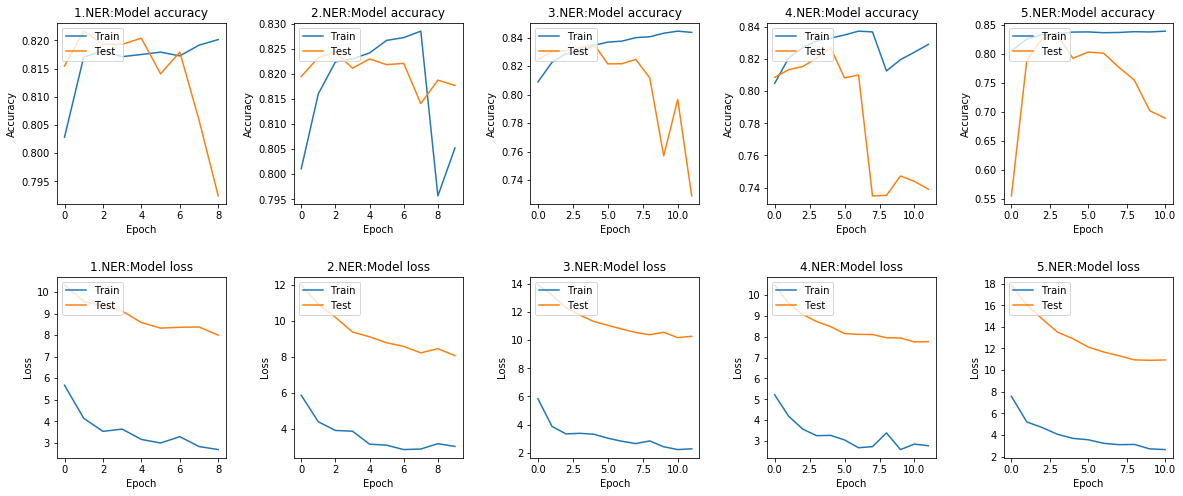

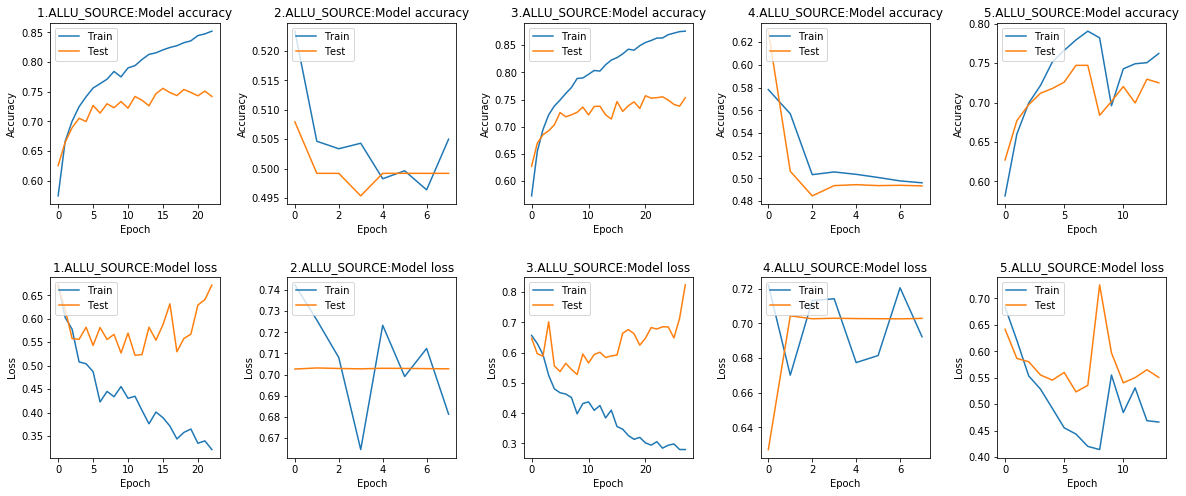

In [5]:
compute_mean_metrics(final_res)
plot_final_res(final_res)

NER	[0.82683538 0.40708513 0.33588554 0.36629976]
ALLU_SOURCE	0.5496380687830688


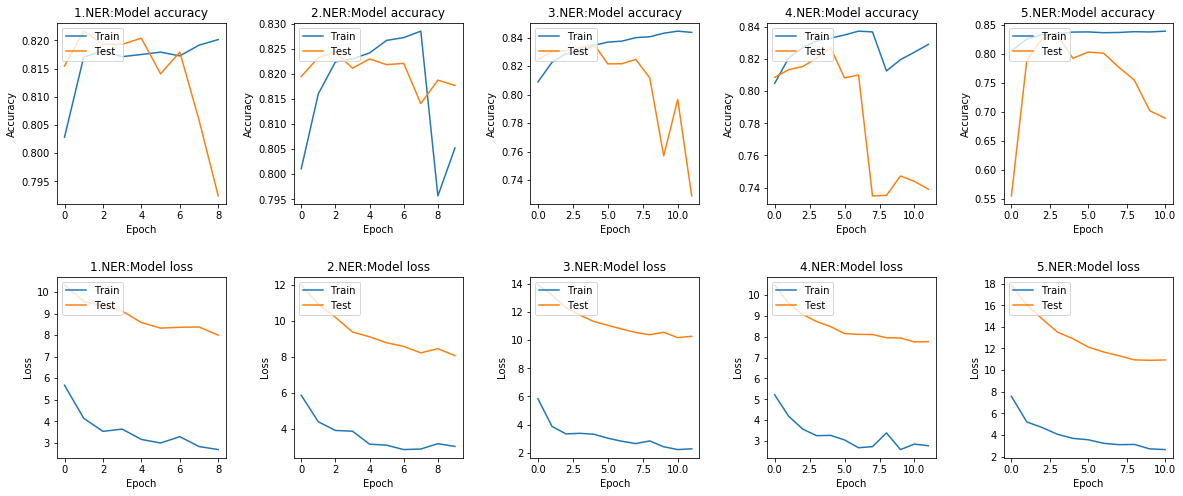

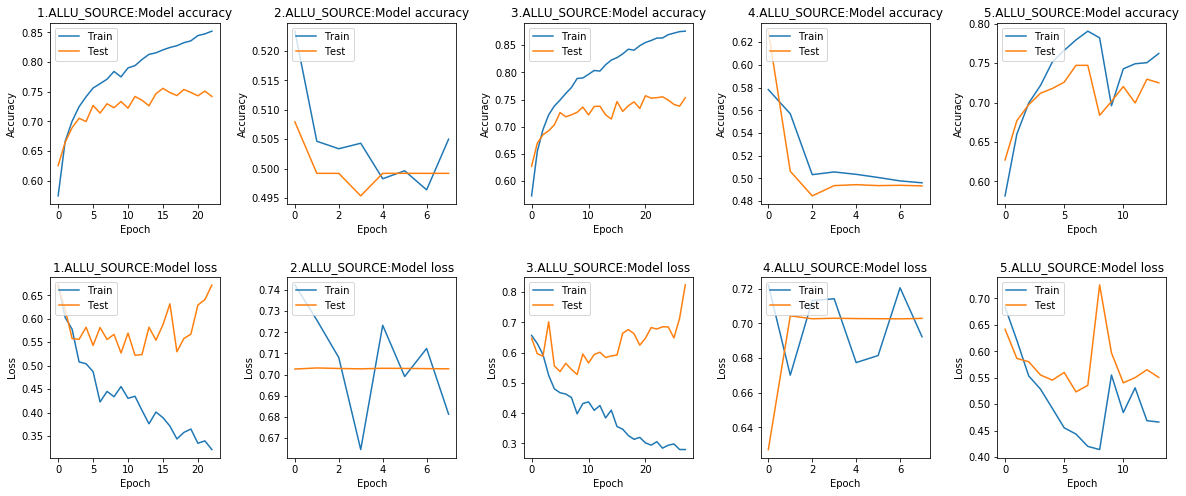

In [6]:
compute_mean_metrics(final_res)
plot_final_res(final_res)